# Dengue EDA

### Importing data and packages

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [329]:
dengue_df = pd.read_csv('Yearly_Dengue_Data.csv')
temps_df = pd.read_csv('clean_Global_temp.csv')

## Summary Statistics of Dengue Dataset

In [307]:
dengue_df.describe()

,Year,Annual_dengue_total
count,1907.000000,1.907000e+03
mean,2010.939171,2.503731e+04
std,6.723865,1.279125e+05
min,2000.000000,0.000000e+00
25%,2005.000000,4.000000e+00
50%,2011.000000,3.700000e+02
75%,2017.000000,8.370000e+03
max,2022.000000,2.253883e+06


In [309]:
dengue_df.nunique()

Country                 102
Year                     23
Annual_dengue_total    1126
dtype: int64

In [311]:
dengue_df.isnull().sum()

Country                0
Year                   0
Annual_dengue_total    0
dtype: int64

## Trend of Annual Dengue Case Counts Over Time

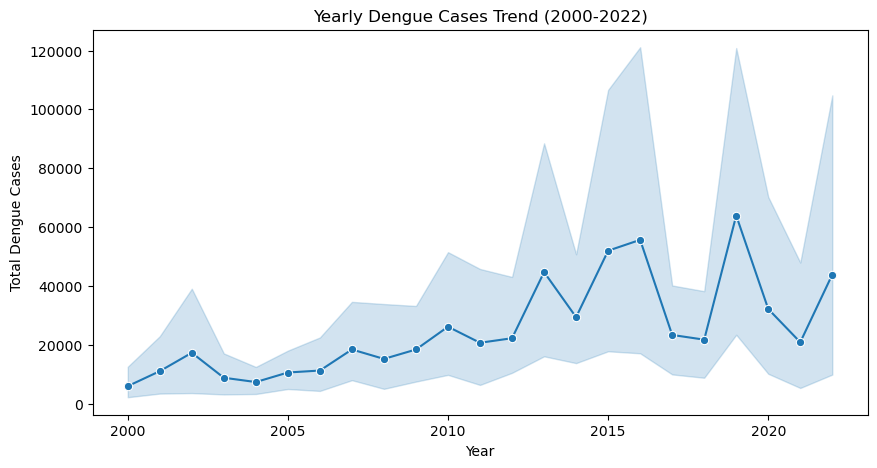

In [314]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Year", y="Annual_dengue_total", data=dengue_df, marker="o")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.title("Yearly Dengue Cases Trend (2000-2022)")
plt.show()

## Highest Counts by Country

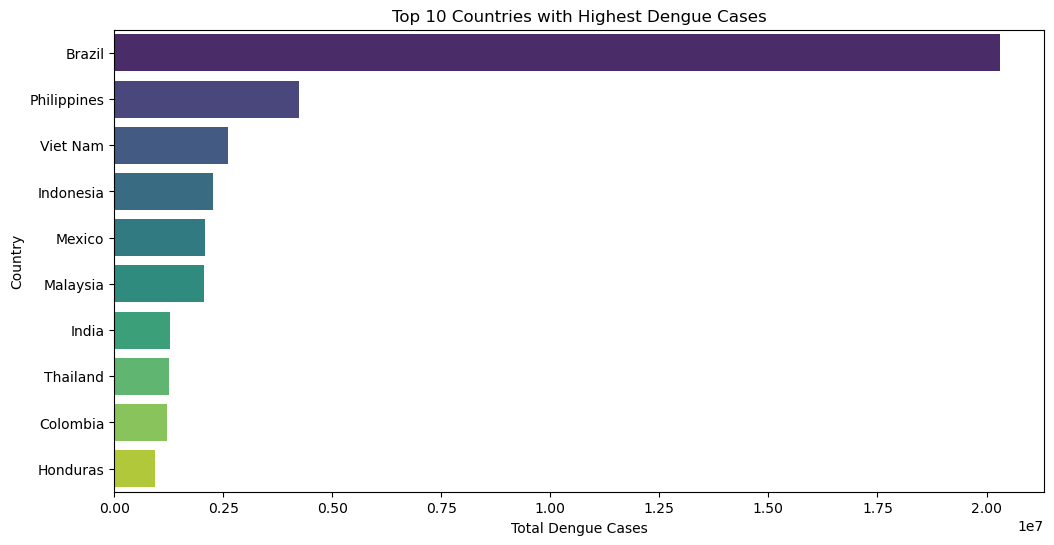

In [322]:
dengue_country = dengue_df.groupby("Country")["Annual_dengue_total"].sum().reset_index()
dengue_country = dengue_country.sort_values(by="Annual_dengue_total", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x="Annual_dengue_total", y="Country", data=dengue_country.head(10), palette="viridis")
plt.xlabel("Total Dengue Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Dengue Cases")
plt.show()

## Heatmap to show where dengue is most persistent and how it has changed over time

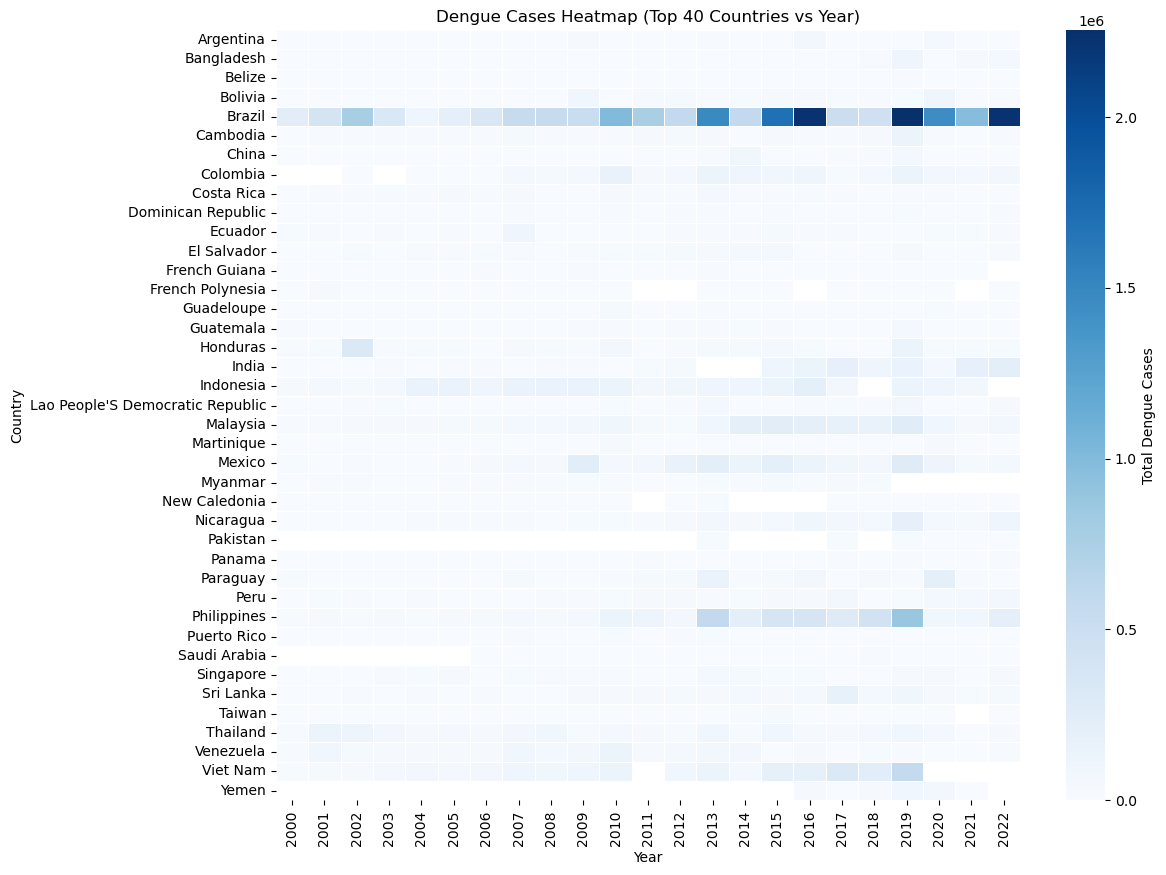

In [325]:
# dataframe consisting of country with total case counts of dengue
total_dengue_by_country = dengue_df.groupby('Country')['Annual_dengue_total'].sum()

# Top 40 countries for dengue count
top_40_countries = total_dengue_by_country.nlargest(40).index

# Pulling top 40 from initial dataset
top_40_dengue_df = dengue_df[dengue_df['Country'].isin(top_40_countries)]

# Pivot data sum monthly dengue cases by year and country for top 40
heatmap_data = top_40_dengue_df.pivot_table(index="Country", columns="Year", values="Annual_dengue_total", aggfunc="sum")

# heatmap
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5, cbar_kws={'label': 'Total Dengue Cases'})
plt.title("Dengue Cases Heatmap (Top 40 Countries vs Year)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()

## Temperature correlation with dengue

In [333]:
temps_df.head()

,Entity,Code,Month,Year,Temperature
0,Afghanistan,AFG,1,1950,-2.655707
1,Afghanistan,AFG,2,1950,-3.996040
2,Afghanistan,AFG,3,1950,3.491112
3,Afghanistan,AFG,4,1950,8.332797
4,Afghanistan,AFG,5,1950,17.329062


In [341]:
temp_yearly = temps_df.groupby(["Entity", "Year"])["Temperature"].mean().reset_index()

In [343]:
# Rename columns to match dengue data
temp_yearly.rename(columns={
    'Entity': 'Country',
    'Code' : 'Country Code'
}, inplace=True)

In [347]:
# merge dengue and temp data on country and year
df_merged = dengue_df.merge(temp_yearly, on=["Country", "Year"], how="inner")

In [351]:
df_merged.head()

,Country,Year,Annual_dengue_total,Temperature
0,Afghanistan,2021,4176.0,13.982914
1,American Samoa,2000,0.0,26.468582
2,American Samoa,2001,500.0,26.643944
3,American Samoa,2002,1185.0,26.963142
4,American Samoa,2003,0.0,26.806831


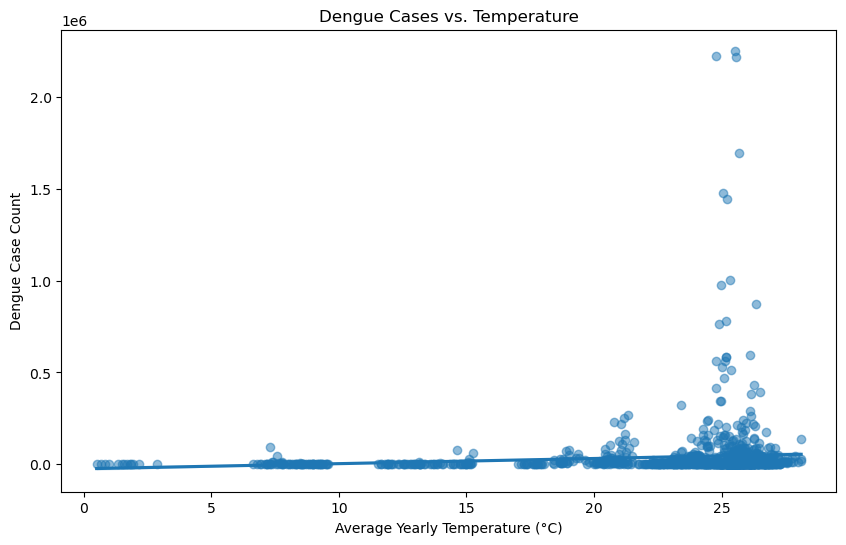

In [353]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_merged, x="Temperature", y="Annual_dengue_total", scatter_kws={'alpha':0.5})
plt.title("Dengue Cases vs. Temperature")
plt.xlabel("Average Yearly Temperature (°C)")
plt.ylabel("Dengue Case Count")
plt.show()

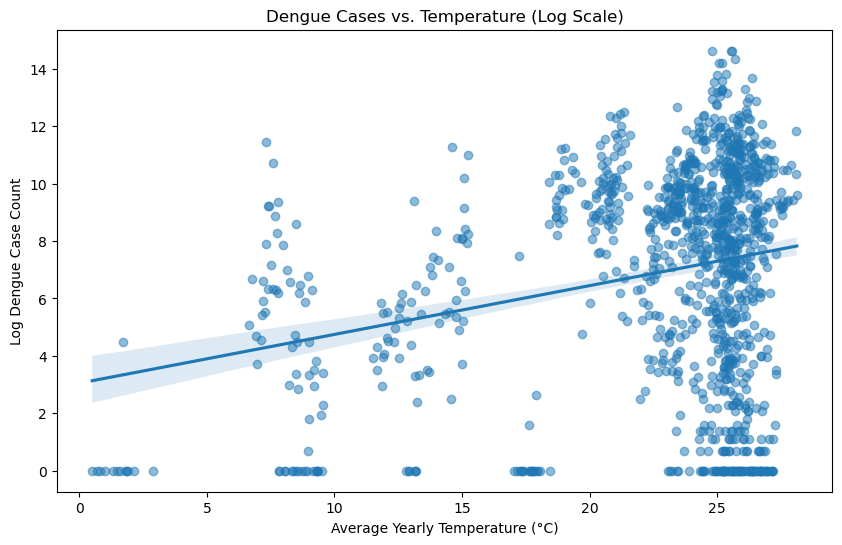

In [377]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_merged, x="Temperature", y=np.log1p(df_merged["Annual_dengue_total"]), scatter_kws={'alpha':0.5})
plt.title("Dengue Cases vs. Temperature (Log Scale)")
plt.xlabel("Average Yearly Temperature (°C)")
plt.ylabel("Log Dengue Case Count")
plt.show()

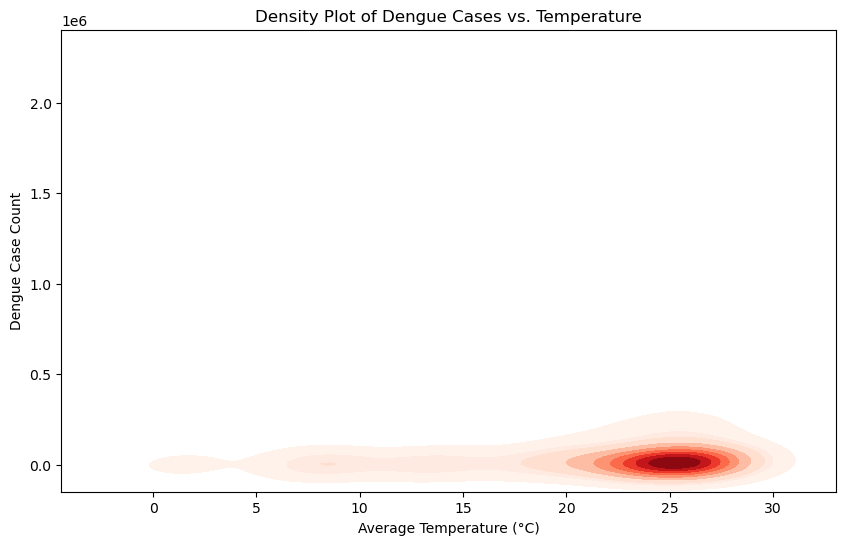

In [379]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_merged, x="Temperature", y=df_merged["Annual_dengue_total"], cmap="Reds", fill=True)
plt.title("Density Plot of Dengue Cases vs. Temperature")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Dengue Case Count")
plt.show()